In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from google.colab import files

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/goalscorers.csv")
data2 = pd.read_csv("/content/drive/MyDrive/result.csv")

In [ ]:
data1["date"]=pd.to_datetime(data1['date'])
data2["date"]=pd.to_datetime(data2['date'])
data1.rename(columns={'team': 'team_scoring'}, inplace=True)
data1

<ipython-input-3-1ec210dd3698>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data2["date"]=pd.to_datetime(data2['date'])


,date,home_team,away_team,team_scoring,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
41003,2022-12-18,Argentina,France,Argentina,Ángel Di María,36.0,False,False
41004,2022-12-18,Argentina,France,France,Kylian Mbappé,80.0,False,True
41005,2022-12-18,Argentina,France,France,Kylian Mbappé,81.0,False,False
41006,2022-12-18,Argentina,France,Argentina,Lionel Messi,109.0,False,False


In [ ]:
data2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False


In [ ]:
columns_to_drop = ['scorer', 'minute', 'own_goal', 'penalty']
data1 = data1.drop(columns=columns_to_drop)

In [ ]:
data1

,date,home_team,away_team,team_scoring
0,1916-07-02,Chile,Uruguay,Uruguay
1,1916-07-02,Chile,Uruguay,Uruguay
2,1916-07-02,Chile,Uruguay,Uruguay
3,1916-07-02,Chile,Uruguay,Uruguay
4,1916-07-06,Argentina,Chile,Argentina
...,...,...,...,...
41003,2022-12-18,Argentina,France,Argentina
41004,2022-12-18,Argentina,France,France
41005,2022-12-18,Argentina,France,France
41006,2022-12-18,Argentina,France,Argentina


In [ ]:
tournament_counts = data2['tournament'].value_counts()
print(tournament_counts)

Friendly                                17593
FIFA World Cup qualification             7878
UEFA Euro qualification                  2631
African Cup of Nations qualification     1976
FIFA World Cup                            964
                                        ...  
Évence Coppée Trophy                        1
Copa Confraternidad                         1
Real Madrid 75th Anniversary Cup            1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 142, dtype: int64


In [ ]:
tournaments_to_keep = ['Friendly', 'FIFA World Cup qualification', 'UEFA Euro qualification', 'African Cup of Nations qualification', 'FIFA World Cup']
data2 = data2[data2['tournament'].isin(tournaments_to_keep)]
data2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44546,2023-03-28,Turkey,Croatia,0,2,UEFA Euro qualification,Bursa,Turkey,False
44547,2023-03-28,Kosovo,Andorra,1,1,UEFA Euro qualification,Pristina,Kosovo,False
44548,2023-03-28,Switzerland,Israel,3,0,UEFA Euro qualification,Geneva,Switzerland,False
44549,2023-03-28,Romania,Belarus,2,1,UEFA Euro qualification,Bucharest,Romania,False


In [ ]:
data2.drop(columns=['neutral'], inplace=True)
data2

<ipython-input-9-24cb1282fd0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(columns=['neutral'], inplace=True)


,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland
...,...,...,...,...,...,...,...,...
44546,2023-03-28,Turkey,Croatia,0,2,UEFA Euro qualification,Bursa,Turkey
44547,2023-03-28,Kosovo,Andorra,1,1,UEFA Euro qualification,Pristina,Kosovo
44548,2023-03-28,Switzerland,Israel,3,0,UEFA Euro qualification,Geneva,Switzerland
44549,2023-03-28,Romania,Belarus,2,1,UEFA Euro qualification,Bucharest,Romania


In [ ]:
data = pd.merge(data1, data2, on=['date', 'home_team', 'away_team'])
print(data)

            date  home_team      away_team   team_scoring  home_score  \
0     1930-07-13    Belgium  United States  United States           0   
1     1930-07-13    Belgium  United States  United States           0   
2     1930-07-13    Belgium  United States  United States           0   
3     1930-07-13     France         Mexico         France           4   
4     1930-07-13     France         Mexico         France           4   
...          ...        ...            ...            ...         ...   
17906 2022-12-18  Argentina         France      Argentina           3   
17907 2022-12-18  Argentina         France         France           3   
17908 2022-12-18  Argentina         France         France           3   
17909 2022-12-18  Argentina         France      Argentina           3   
17910 2022-12-18  Argentina         France         France           3   

       away_score      tournament        city  country  
0               3  FIFA World Cup  Montevideo  Uruguay  
1        

In [ ]:
data['winner'] = data.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score']
                        else row['away_team'] if row['home_score'] < row['away_score']
                        else 'Draw', axis=1)
data

,date,home_team,away_team,team_scoring,home_score,away_score,tournament,city,country,winner
0,1930-07-13,Belgium,United States,United States,0,3,FIFA World Cup,Montevideo,Uruguay,United States
1,1930-07-13,Belgium,United States,United States,0,3,FIFA World Cup,Montevideo,Uruguay,United States
2,1930-07-13,Belgium,United States,United States,0,3,FIFA World Cup,Montevideo,Uruguay,United States
3,1930-07-13,France,Mexico,France,4,1,FIFA World Cup,Montevideo,Uruguay,France
4,1930-07-13,France,Mexico,France,4,1,FIFA World Cup,Montevideo,Uruguay,France
...,...,...,...,...,...,...,...,...,...,...
17906,2022-12-18,Argentina,France,Argentina,3,3,FIFA World Cup,Lusail,Qatar,Draw
17907,2022-12-18,Argentina,France,France,3,3,FIFA World Cup,Lusail,Qatar,Draw
17908,2022-12-18,Argentina,France,France,3,3,FIFA World Cup,Lusail,Qatar,Draw
17909,2022-12-18,Argentina,France,Argentina,3,3,FIFA World Cup,Lusail,Qatar,Draw


In [ ]:
data['winning_status'] = ''

for index, row in data.iterrows():
    if row['home_score'] > row['away_score']:
        data.at[index, 'winning_status'] = "win"
    elif row['home_score'] < row['away_score']:
        data.at[index, 'winning_status'] = "loose"
    else:
        data.at[index, 'winning_status'] = 'Draw'


In [ ]:
data = data.drop_duplicates()
data

,date,home_team,away_team,team_scoring,home_score,away_score,tournament,city,country,winner,winning_status
0,1930-07-13,Belgium,United States,United States,0,3,FIFA World Cup,Montevideo,Uruguay,United States,loose
3,1930-07-13,France,Mexico,France,4,1,FIFA World Cup,Montevideo,Uruguay,France,win
6,1930-07-13,France,Mexico,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,France,win
8,1930-07-14,Brazil,Yugoslavia,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,Yugoslavia,loose
10,1930-07-14,Brazil,Yugoslavia,Brazil,1,2,FIFA World Cup,Montevideo,Uruguay,Yugoslavia,loose
...,...,...,...,...,...,...,...,...,...,...,...
17900,2022-12-14,France,Morocco,France,2,0,FIFA World Cup,Al Khor,Qatar,France,win
17902,2022-12-17,Croatia,Morocco,Croatia,2,1,FIFA World Cup,Al Rayyan,Qatar,Croatia,win
17903,2022-12-17,Croatia,Morocco,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,Croatia,win
17905,2022-12-18,Argentina,France,Argentina,3,3,FIFA World Cup,Lusail,Qatar,Draw,Draw


In [ ]:
data

,date,home_team,away_team,team_scoring,home_score,away_score,tournament,city,country,winner,winning_status
0,1930-07-13,Belgium,United States,United States,0,3,FIFA World Cup,Montevideo,Uruguay,United States,loose
3,1930-07-13,France,Mexico,France,4,1,FIFA World Cup,Montevideo,Uruguay,France,win
6,1930-07-13,France,Mexico,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,France,win
8,1930-07-14,Brazil,Yugoslavia,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,Yugoslavia,loose
10,1930-07-14,Brazil,Yugoslavia,Brazil,1,2,FIFA World Cup,Montevideo,Uruguay,Yugoslavia,loose
...,...,...,...,...,...,...,...,...,...,...,...
17900,2022-12-14,France,Morocco,France,2,0,FIFA World Cup,Al Khor,Qatar,France,win
17902,2022-12-17,Croatia,Morocco,Croatia,2,1,FIFA World Cup,Al Rayyan,Qatar,Croatia,win
17903,2022-12-17,Croatia,Morocco,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,Croatia,win
17905,2022-12-18,Argentina,France,Argentina,3,3,FIFA World Cup,Lusail,Qatar,Draw,Draw


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,8333.0,1.988120,1.687897,0.0,1.0,2.0,3.0,19.0
away_score,8333.0,1.337453,1.288408,0.0,0.0,1.0,2.0,12.0


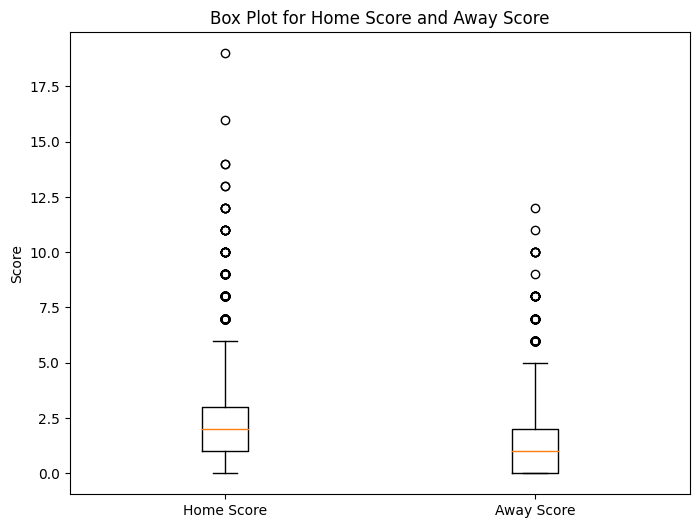

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([data['home_score'], data['away_score']], labels=['Home Score', 'Away Score'])
plt.title("Box Plot for Home Score and Away Score")
plt.ylabel("Score")
plt.show()

In [ ]:
from scipy import stats
data['home_score_z'] = stats.zscore(data['home_score'])
data['away_score_z'] = stats.zscore(data['away_score'])
threshold = 3
home_score_outliers = abs(data['home_score_z']) > threshold
away_score_outliers = abs(data['away_score_z']) > threshold
outliers = home_score_outliers | away_score_outliers
num_outliers = outliers.sum()
print("Number of outliers:", num_outliers)
data = data.loc[~outliers]
data.drop(columns=['home_score_z', 'away_score_z'], inplace=True)
print(data)

Number of outliers: 224
            date  home_team      away_team   team_scoring  home_score  \
0     1930-07-13    Belgium  United States  United States           0   
3     1930-07-13     France         Mexico         France           4   
6     1930-07-13     France         Mexico         Mexico           4   
8     1930-07-14     Brazil     Yugoslavia     Yugoslavia           1   
10    1930-07-14     Brazil     Yugoslavia         Brazil           1   
...          ...        ...            ...            ...         ...   
17900 2022-12-14     France        Morocco         France           2   
17902 2022-12-17    Croatia        Morocco        Croatia           2   
17903 2022-12-17    Croatia        Morocco        Morocco           2   
17905 2022-12-18  Argentina         France      Argentina           3   
17907 2022-12-18  Argentina         France         France           3   

       away_score      tournament        city  country         winner  \
0               3  FIFA Wo

<ipython-input-17-e73734c5171f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['home_score_z'] = stats.zscore(data['home_score'])
<ipython-input-17-e73734c5171f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['away_score_z'] = stats.zscore(data['away_score'])
<ipython-input-17-e73734c5171f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,8109.0,1.903441,1.452903,0.0,1.0,2.0,3.0,7.0
away_score,8109.0,1.274386,1.115687,0.0,0.0,1.0,2.0,5.0


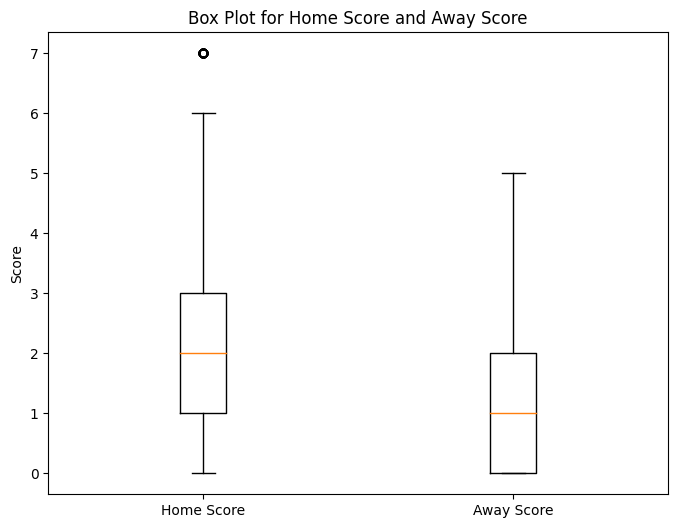

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([data['home_score'], data['away_score']], labels=['Home Score', 'Away Score'])
plt.title("Box Plot for Home Score and Away Score")
plt.ylabel("Score")
plt.show()

In [ ]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

date              0
home_team         0
away_team         0
team_scoring      0
home_score        0
away_score        0
tournament        0
city              0
country           0
winner            0
winning_status    0
dtype: int64


In [ ]:
b=data.head(200)


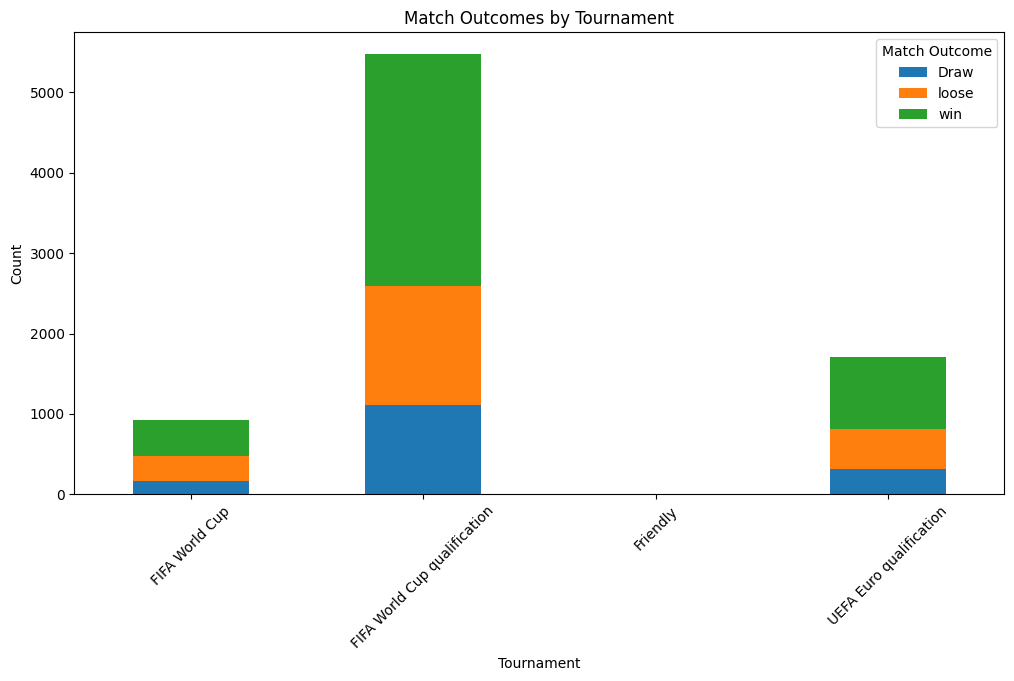

In [ ]:
outcome_counts = data.groupby(['tournament', 'winning_status']).size().unstack().fillna(0)
outcome_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Tournament')
plt.ylabel('Count')
plt.title('Match Outcomes by Tournament')
plt.xticks(rotation=45)
plt.legend(title='Match Outcome')
plt.show()

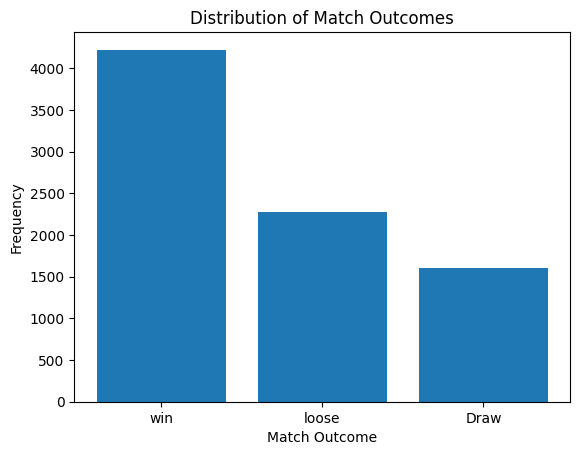

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = data[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'winning_status']]
outcome_counts = df['winning_status'].value_counts()

plt.bar(outcome_counts.index, outcome_counts.values)
plt.xlabel('Match Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Match Outcomes')
plt.show()

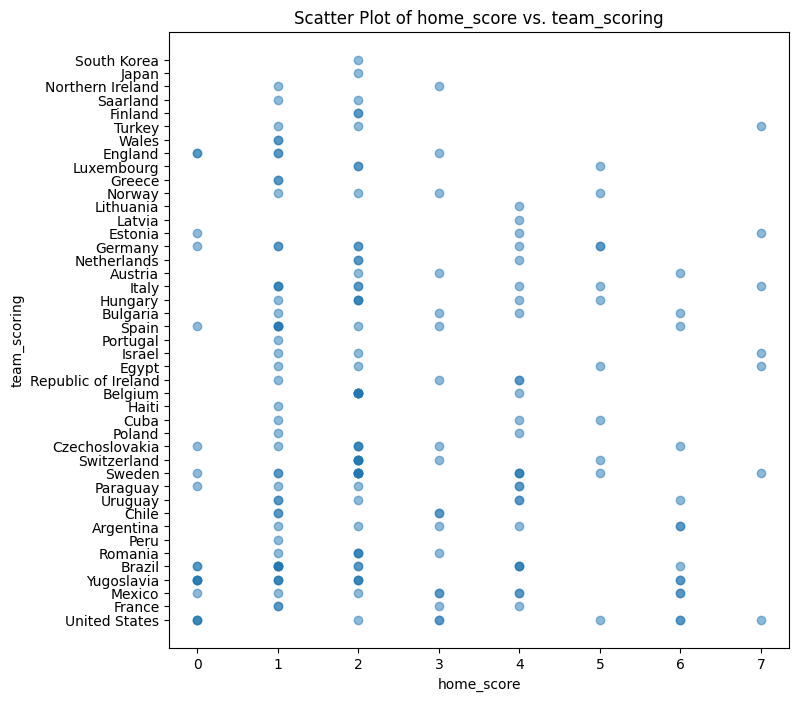

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Selecting different numerical columns for the scatter plot
# You can change these column names to create scatter plots for other columns in your dataset
x_column = 'home_score'
y_column = 'team_scoring'

# Plotting the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(b[x_column], b[y_column], alpha=0.5)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot of {x_column} vs. {y_column}')
plt.show()




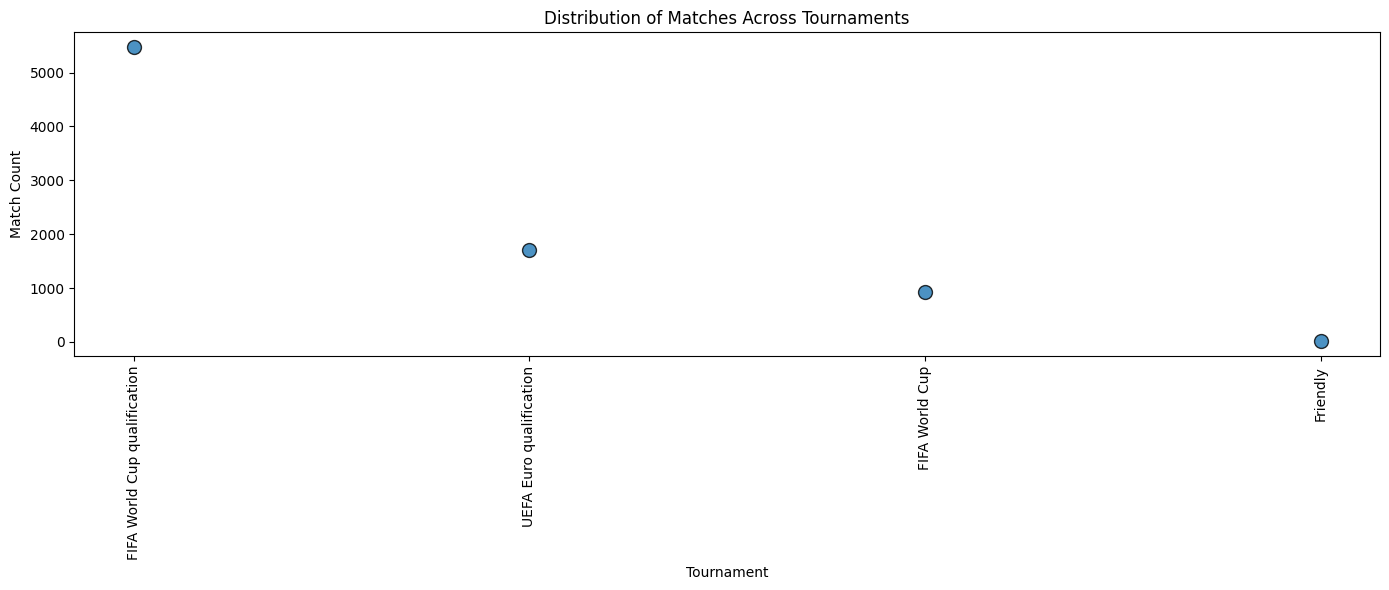

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
tournament_counts = data['tournament'].value_counts().reset_index()
tournament_counts.columns = ['tournament', 'count']

# Selecting tournament and count as x and y variables for the scatter plot
x = tournament_counts['tournament']
y = tournament_counts['count']

# Plotting the scatter plot
plt.figure(figsize=(14, 6))
plt.scatter(x, y, alpha=0.8, marker='o', edgecolors='k', s=100)
plt.xlabel('Tournament')
plt.ylabel('Match Count')
plt.title('Distribution of Matches Across Tournaments')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # To prevent overlapping of labels
plt.show()


In [ ]:
columns_to_drop = ['date', 'tournament','country','winning_status','team_scoring']
data = data.drop(columns=columns_to_drop)

In [ ]:
df_encoded = pd.get_dummies(data, columns=['home_team', 'away_team'])

In [ ]:
home_team_wins = data[data['home_score'] > data['away_score']].groupby('home_team').size()
home_team_matches = data.groupby('home_team').size()
data['home_team_win_percentage'] = (home_team_wins / home_team_matches)*100


away_team_wins = data[data['away_score'] > data['home_score']].groupby('away_team').size()
away_team_matches = data.groupby('away_team').size()
data['away_team_win_percentage'] = (away_team_wins / away_team_matches)*100



In [ ]:
home_team_wins = data.groupby('home_team').apply(lambda x: (x['home_score'] > x['away_score']).sum())
home_team_matches = data['home_team'].value_counts()
data['home_team_win_percentage'] = (home_team_wins.reindex(data['home_team']).values / home_team_matches.reindex(data['home_team']).values)*100

In [ ]:
away_team_wins = data.groupby('away_team').apply(lambda x: (x['away_score'] > x['home_score']).sum())
away_team_matches = data['away_team'].value_counts()
data['away_team_win_percentage'] =(away_team_wins.reindex(data['away_team']).values / away_team_matches.reindex(data['away_team']).values)*100

In [ ]:
data['home_team_win_percentage'] = data['home_team_win_percentage'].astype(int)
data['away_team_win_percentage'] = data['away_team_win_percentage'].astype(int)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8109 entries, 0 to 17907
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   home_team                 8109 non-null   object
 1   away_team                 8109 non-null   object
 2   home_score                8109 non-null   int64 
 3   away_score                8109 non-null   int64 
 4   city                      8109 non-null   object
 5   winner                    8109 non-null   object
 6   home_team_win_percentage  8109 non-null   int64 
 7   away_team_win_percentage  8109 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 570.2+ KB


In [ ]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5397 entries, 0 to 17905
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   home_team                 5397 non-null   object
 1   away_team                 5397 non-null   object
 2   home_score                5397 non-null   int64 
 3   away_score                5397 non-null   int64 
 4   city                      5397 non-null   object
 5   winner                    5397 non-null   object
 6   home_team_win_percentage  5397 non-null   int64 
 7   away_team_win_percentage  5397 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 379.5+ KB


In [ ]:
data.reset_index(drop=True, inplace=True)
data

,home_team,away_team,home_score,away_score,city,winner,home_team_win_percentage,away_team_win_percentage
0,Belgium,United States,0,3,Montevideo,United States,57,29
1,France,Mexico,4,1,Montevideo,France,72,28
2,Brazil,Yugoslavia,1,2,Montevideo,Yugoslavia,68,44
3,Peru,Romania,1,3,Montevideo,Romania,42,33
4,Argentina,France,1,0,Montevideo,Argentina,71,38
...,...,...,...,...,...,...,...,...
5392,Tunisia,France,1,0,Al Rayyan,Tunisia,72,38
5393,Argentina,Croatia,3,0,Lusail,Argentina,71,53
5394,France,Morocco,2,0,Al Khor,France,72,19
5395,Croatia,Morocco,2,1,Al Rayyan,Croatia,79,19


In [ ]:
b = data.head(100)

In [ ]:
a = b.copy()
a

,home_team,away_team,home_score,away_score,city,winner,home_team_win_percentage,away_team_win_percentage
0,Belgium,United States,0,3,Montevideo,United States,57,29
1,France,Mexico,4,1,Montevideo,France,72,28
2,Brazil,Yugoslavia,1,2,Montevideo,Yugoslavia,68,44
3,Peru,Romania,1,3,Montevideo,Romania,42,33
4,Argentina,France,1,0,Montevideo,Argentina,71,38
...,...,...,...,...,...,...,...,...
95,Romania,Bulgaria,3,1,Bucharest,Romania,60,26
96,Norway,Germany,1,1,Oslo,Draw,35,68
97,Belgium,Finland,2,2,Brussels,Draw,57,11
98,Romania,Czechoslovakia,0,1,Bucharest,Czechoslovakia,60,22


# **KNOWLEDGE GRAPH**

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Sample data as a pandas DataFrame

df = pd.DataFrame(a)

# Create a directed graph
G = nx.DiGraph()

teams = set(df['home_team']).union(set(df['away_team']))
cities = set(df['city'])
G.add_nodes_from(teams, node_type='team')
G.add_nodes_from(cities, node_type='city')

for idx, row in df.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_score = row['home_score']
    away_score = row['away_score']
    city = row['city']
    winner = row['winner']
    home_team_win_percentage = row['home_team_win_percentage']
    away_team_win_percentage = row['away_team_win_percentage']

    G.add_edge(home_team, away_team, match_info={
        'home_score': home_score,
        'away_score': away_score,
        'city': city,
        'winner': winner,
        'home_team_win_percentage': home_team_win_percentage,
        'away_team_win_percentage': away_team_win_percentage,
    })

# Visualize the graph (optional)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
node_colors = ['skyblue' if node_type == 'team' else 'lightgreen' for _, node_type in nx.get_node_attributes(G, 'node_type').items()]
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=2000, font_size=10)
plt.title("Football Match Knowledge Graph")
plt.show()


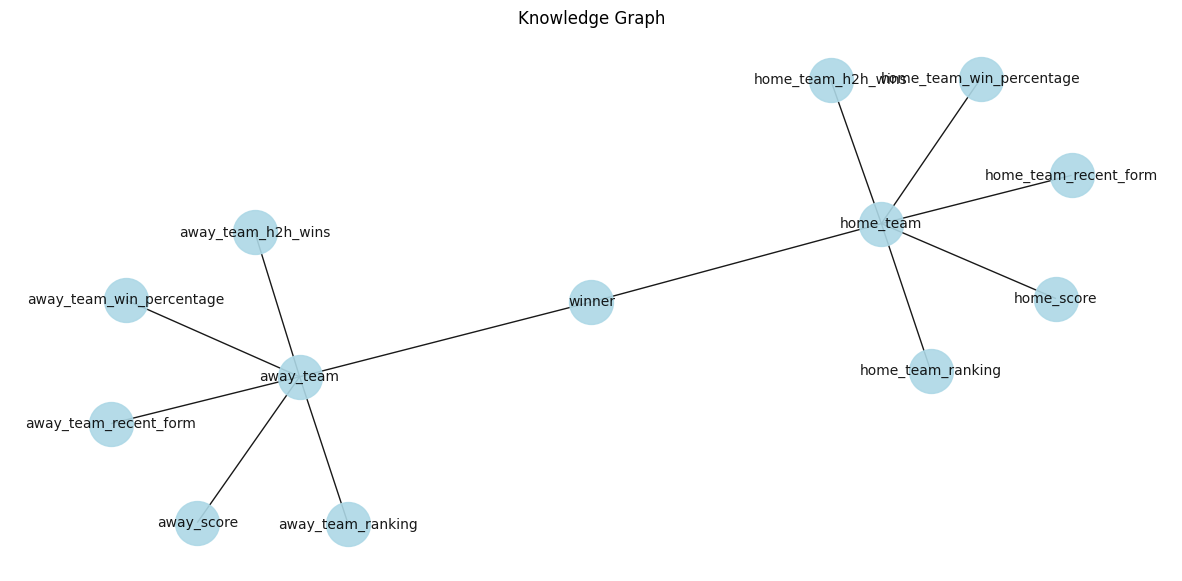

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
graph = nx.Graph()
columns = ['home_team', 'away_team', 'home_score', 'away_score', 'winner',
           'home_team_win_percentage', 'away_team_win_percentage', 'home_team_ranking',
           'away_team_ranking', 'home_team_recent_form', 'away_team_recent_form',
           'home_team_h2h_wins', 'away_team_h2h_wins']
for column in columns:
    graph.add_node(column)
edges = [('home_team', 'home_score'), ('away_team', 'away_score'),
         ('home_team', 'home_team_win_percentage'), ('away_team', 'away_team_win_percentage'),
         ('home_team', 'home_team_ranking'), ('away_team', 'away_team_ranking'),
         ('home_team', 'home_team_recent_form'), ('away_team', 'away_team_recent_form'),
         ('home_team', 'home_team_h2h_wins'), ('away_team', 'away_team_h2h_wins'),
         ('away_team', 'winner'), ('home_team', 'winner')]
for edge in edges:
    graph.add_edge(*edge)
plt.figure(figsize=(15, 7))

pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=10, alpha=0.9)
plt.title('Knowledge Graph')
plt.axis('off')
plt.show()

## **SPLITTING**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = data.drop(columns=['winner'])
y = data['winner']

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

categorical_cols = ['home_team', 'away_team', 'city']
preprocessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)
data

,home_team,away_team,home_score,away_score,city,winner,home_team_win_percentage,away_team_win_percentage
0,Belgium,United States,0,3,Montevideo,United States,57,29
1,France,Mexico,4,1,Montevideo,France,72,28
2,Brazil,Yugoslavia,1,2,Montevideo,Yugoslavia,68,44
3,Peru,Romania,1,3,Montevideo,Romania,42,33
4,Argentina,France,1,0,Montevideo,Argentina,71,38
...,...,...,...,...,...,...,...,...
5392,Tunisia,France,1,0,Al Rayyan,Tunisia,72,38
5393,Argentina,Croatia,3,0,Lusail,Argentina,71,53
5394,France,Morocco,2,0,Al Khor,France,72,19
5395,Croatia,Morocco,2,1,Al Rayyan,Croatia,79,19


# **Random forest**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8722222222222222


### **DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dt_classifier = DecisionTreeClassifier()
d=dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.912962962962963


# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [ ]:
model = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter wa

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6583333333333333


# **Creating files for model and label encoder**

In [ ]:
import joblib
joblib.dump(model1,"/content/drive/MyDrive/Winner_Prediction/WP_GUI.joblib")
joblib.dump(preprocessor, '/content/drive/MyDrive/Winner_Prediction/preprocessor.joblib')
joblib.dump(label_encoder, '/content/drive/MyDrive/Winner_Prediction/label_encoder.joblib')

['/content/drive/MyDrive/Winner_Prediction/label_encoder.joblib']

# **Graphical user interface**

downloading model and some functions inorder to use it in the gui code

In [ ]:
with open('model1.pkl', 'wb') as file:
    pickle.dump(model1, file)
files.download('model1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)
files.download('preprocessor.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)
files.download('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data

,home_team,away_team,home_score,away_score,city,winner,home_team_win_percentage,away_team_win_percentage
0,Belgium,United States,0,3,Montevideo,United States,57,29
1,France,Mexico,4,1,Montevideo,France,72,28
2,Brazil,Yugoslavia,1,2,Montevideo,Yugoslavia,68,44
3,Peru,Romania,1,3,Montevideo,Romania,42,33
4,Argentina,France,1,0,Montevideo,Argentina,71,38
...,...,...,...,...,...,...,...,...
5392,Tunisia,France,1,0,Al Rayyan,Tunisia,72,38
5393,Argentina,Croatia,3,0,Lusail,Argentina,71,53
5394,France,Morocco,2,0,Al Khor,France,72,19
5395,Croatia,Morocco,2,1,Al Rayyan,Croatia,79,19


In [ ]:
datax=data[['home_team','home_team_win_percentage']].copy()
a=datax.drop_duplicates()
a.head()

,home_team,home_team_win_percentage
0,Belgium,57
1,France,72
2,Brazil,68
3,Peru,42
4,Argentina,71


In [ ]:
dataa=data[['away_team','away_team_win_percentage']].copy()
a=dataa.drop_duplicates()
a

,away_team,away_team_win_percentage
0,United States,29
1,Mexico,28
2,Yugoslavia,44
3,Romania,33
4,France,38
...,...,...
4513,Afghanistan,14
4557,South Sudan,0
4570,Guam,0
4673,Bhutan,0


In [ ]:
datax.set_index('home_team')['home_team_win_percentage'].to_dict()

{'Belgium': 57,
 'France': 72,
 'Brazil': 68,
 'Peru': 42,
 'Argentina': 71,
 'Chile': 48,
 'Bolivia': 46,
 'Paraguay': 61,
 'Uruguay': 64,
 'Lithuania': 26,
 'Yugoslavia': 79,
 'Poland': 54,
 'Switzerland': 53,
 'Haiti': 32,
 'Republic of Ireland': 40,
 'Egypt': 76,
 'Mexico': 78,
 'Portugal': 64,
 'Bulgaria': 52,
 'Italy': 65,
 'Austria': 67,
 'Hungary': 55,
 'Romania': 60,
 'Czechoslovakia': 75,
 'Netherlands': 70,
 'Germany': 70,
 'Sweden': 60,
 'Finland': 41,
 'Latvia': 40,
 'Norway': 35,
 'Israel': 41,
 'Greece': 54,
 'Luxembourg': 5,
 'United States': 63,
 'Wales': 46,
 'Turkey': 48,
 'Scotland': 57,
 'Spain': 66,
 'England': 68,
 'Japan': 46,
 'Saarland': 0,
 'Costa Rica': 73,
 'Guatemala': 53,
 'Denmark': 46,
 'German DR': 52,
 'Syria': 48,
 'Colombia': 50,
 'Canada': 76,
 'Russia': 69,
 'Northern Ireland': 60,
 'Ghana': 69,
 'Nigeria': 50,
 'Honduras': 34,
 'Morocco': 64,
 'Cyprus': 22,
 'Tunisia': 72,
 'Curaçao': 61,
 'South Korea': 59,
 'Albania': 20,
 'Jamaica': 45,
 'Cuba

In [ ]:
dataa.set_index('away_team')['away_team_win_percentage'].to_dict()

{'United States': 29,
 'Mexico': 28,
 'Yugoslavia': 44,
 'Romania': 33,
 'France': 38,
 'Peru': 12,
 'Paraguay': 21,
 'Brazil': 52,
 'Chile': 25,
 'Argentina': 48,
 'Sweden': 41,
 'Switzerland': 38,
 'Czechoslovakia': 22,
 'Cuba': 33,
 'Belgium': 40,
 'Israel': 23,
 'Spain': 52,
 'Hungary': 45,
 'Greece': 20,
 'Bulgaria': 26,
 'Netherlands': 52,
 'Germany': 68,
 'Finland': 11,
 'Estonia': 17,
 'Lithuania': 15,
 'Republic of Ireland': 28,
 'Luxembourg': 7,
 'Italy': 55,
 'England': 48,
 'Syria': 25,
 'Uruguay': 33,
 'Saarland': 100,
 'Northern Ireland': 20,
 'Norway': 25,
 'Egypt': 24,
 'South Korea': 36,
 'Scotland': 26,
 'Turkey': 22,
 'Guatemala': 40,
 'Curaçao': 27,
 'Wales': 24,
 'Sudan': 0,
 'German DR': 34,
 'Poland': 38,
 'Canada': 16,
 'Colombia': 25,
 'Bolivia': 0,
 'Austria': 25,
 'Costa Rica': 34,
 'Russia': 35,
 'Portugal': 41,
 'Denmark': 31,
 'Nigeria': 34,
 'Ghana': 27,
 'Tunisia': 32,
 'Morocco': 19,
 'Cyprus': 12,
 'Ecuador': 15,
 'Honduras': 20,
 'Ethiopia': 4,
 'Malt

In [ ]:
a=data['city'].tolist()
b=list(set(a))

In [ ]:
!pip install streamlit

In [ ]:
%%writefile WP.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model from the file
model = joblib.load('/content/drive/MyDrive/Winner_Prediction/WP_GUI.joblib')
preprocessor = joblib.load('/content/drive/MyDrive/Winner_Prediction/preprocessor.joblib')
label_encoder = joblib.load('/content/drive/MyDrive/Winner_Prediction/label_encoder.joblib')

# Create a Streamlit web app
st.title("Football Match Winner Prediction")
st.markdown("Enter match details below and click 'Predict Winner'.")


# Custom CSS to add background image
st.markdown(
    """
    <style>
    body {
        background-image: url("/content/drive/MyDrive/Winner_Prediction/st.jpg");
        background-size: cover;
    }
    </style>
    """,
    unsafe_allow_html=True
)





# Dropdown menu options for all the input fields
team_options = ['Lesotho','South Korea','England','Uganda','Northern Ireland', 'Timor-Leste', 'Libya', 'North Macedonia', 'Denmark', 'Canada', 'Latvia', 'Bhutan', 'Germany', 'Cambodia',
 'Chad', 'Sudan', 'Guam', 'Macau', 'Mauritania', 'Comoros', 'Turks and Caicos Islands', 'India', 'Maldives', 'Yugoslavia', 'Mauritius', 'Panama', 'United States Virgin Islands' 'Solomon Islands',
  'Burkina Faso', 'Peru', 'Aruba', 'Indonesia', 'Qatar', 'Moldova', 'Kyrgyzstan', 'Puerto Rico', 'Dominica', 'Luxembourg', 'Cook Islands', 'Ethiopia', 'Vietnam Republic', 'Hungary',
 'Ghana', 'Vanuatu', 'Yemen DPR', 'Paraguay', 'Romania', 'Iran', 'Kuwait', 'Belarus', 'Sweden', 'Poland', 'Turkmenistan', 'Bosnia and Herzegovina', 'Palestine', 'Afghanistan', 'Kosovo',
 'Mozambique', 'Croatia', 'Portugal', 'Ecuador', 'Liechtenstein', 'Austria', 'Hong Kong', 'Somalia', 'Eritrea', 'France', 'Guinea', 'Guatemala', 'Taiwan', 'Slovenia', 'Grenada', 'Venezuela',
 'Suriname', 'Malawi', 'Saint Vincent and the Grenadines', 'Togo', 'Sri Lanka', 'Bahamas', 'Senegal', 'Laos', 'Czechoslovakia', 'Israel', 'Chile', 'Dominican Republic', 'South Africa',
 'Saarland', 'Liberia', 'United Arab Emirates', 'Antigua and Barbuda', 'Syria', 'Netherlands', 'Costa Rica', 'Tanzania', 'New Caledonia', 'Cuba', 'Italy', 'Belize', 'Mali', 'Argentina',
 'Zambia', 'Trinidad and Tobago', 'Madagascar', 'Gambia', 'Japan', 'Zimbabwe', 'Congo', 'Gabon', 'Australia', 'Uzbekistan', 'Cameroon', 'Egypt', 'Eswatini', 'Estonia', 'Andorra', 'Fiji',
 'Norway', 'Jordan', 'Anguilla', 'Botswana', 'Iceland', 'Cape Verde', 'Sierra Leone', 'Saudi Arabia', 'Tajikistan', 'Georgia', 'Uruguay', 'Republic of Ireland', 'Scotland', 'Jamaica',
 'Algeria', 'Philippines', 'Honduras', 'Burundi', 'Guinea-Bissau', 'Central African Republic', 'Nigeria', 'Cayman Islands', 'Rwanda', 'Niger', 'Tonga', 'Albania','Tahiti', 'Colombia',
 'Cyprus', 'Pakistan','New Zealand', 'Samoa', 'Iraq', 'Montserrat', 'Kenya', 'Yemen', 'Brazil', 'Turkey', 'Vietnam', 'Azerbaijan', 'Lithuania', 'Ukraine', 'Bulgaria', 'Malta', 'Barbados',
 'Switzerland', 'Oman', 'Morocco', 'Belgium', 'San Marino', 'Bangladesh', 'Angola', 'Saint Lucia', 'North Korea', 'DR Congo', 'Nicaragua', 'Myanmar', 'Bermuda', 'Spain', 'Singapore',
 'Armenia', 'Seychelles', 'El Salvador', 'German DR', 'China PR', 'Benin', 'Greece', 'Nepal', 'Curaçao', 'Gibraltar', 'Tunisia', 'Namibia', 'Russia', 'Bahrain', 'São Tomé and Príncipe',
 'Papua New Guinea', 'Finland', 'Wales', 'Djibouti', 'Saint Kitts and Nevis', 'Ivory Coast','Thailand', 'Faroe Islands', 'Guyana', 'Mongolia', 'Brunei', 'Haiti', 'British Virgn Islands',
 'Czech Republic', 'Mexico', 'Serbia', 'Bolivia', 'Lebanon', 'Kazakhstan', 'United States', 'Malaysia', 'Slovakia', 'Equatorial Guinea', 'American Samoa', 'Montenegro']


city_options = ['Amman', 'Lausanne', 'Praia', 'Dresden', 'Caracas', 'Lima', 'Rijeka', 'Ciudad Guayana', 'Lautoka', "Sana'a", 'Valencia', 'Honiara', 'Bakau', 'Tegucigalpa', 'Nur-Sultan',
 'North Shore', 'So Kon Po', 'Guimarães', 'Ōita', 'Libreville', 'Taipei', 'Fukuroi', 'Gera', 'Victoria', 'Uherské Hradiště', 'Kumasi', 'Harare', 'Reggio Emilia','Tripoli', 'Turin', 'Margao',
 'Bujumbura', 'Pristina', 'Buenos Aires', 'Hialeah', 'Radès', 'Entebbe', 'Arica', 'Riga', 'Wrocław', 'Jeddah', 'Toulouse', 'Hartford', 'Lahti', 'Lookout', 'Addis Ababa', 'Esch-sur-Azette',
 'Pasadena', 'Monterrey', 'Damascus', 'St. Louis', 'Nuremberg', 'Stockholm','Agadir', 'Castries', 'Tangier', 'Athens', 'Dushanbe', 'Alicante', 'Coffs Harbour', 'Warsaw', 'Gijón', 'London',
 'Montpellier', 'Bayamón', 'Sandviken', 'Muscat', 'Macau', 'Jeonju', 'Auxerre', 'Maseru', 'Luanda', 'Foggia', 'Oslo', 'Las Palmas', 'Santa Cruz', 'Port Elizabeth', 'Saint-Denis', 'Christchurch', 'Sharjah',
 'Irbid', 'Osijek', 'Malabo', 'Toftir', 'Torreón', 'Bursa', 'Lae', 'Valladolid', 'Kansas City', 'Lucerne', 'Pori', 'Erbil', 'Kuala Lumpur', 'Tashkent', 'Bin Ghashir', 'Santiago', 'Kaohsiung', 'East Rutherford',
 'Tallinn', 'Graz', 'Samara', 'Buriram', 'Goyang', 'Antananarivo', 'Gaborone', 'Mogadishu', 'Burnaby', 'Dortmund', 'Porto', 'Titova Mitrovica', 'Groningen', 'Heraklion', 'Attard','Sandy',
 'Shiraz', 'Craiova', 'San Jose', 'Sochi', 'Orange Walk', 'Shenyang', 'Ulsan', 'Latakia', 'Basra', 'Tétouan', 'Ndola', 'San Cristóbal', 'Hrodna', 'Alexandria', 'Conakry', 'Ulaanbaatar',
 'Utrecht', 'Edinburgh', 'Palo Alto', 'Nizhny Novgorod', 'Bridgeview', 'Skopje', 'Bordeaux', 'Guatemala', 'Ostrava','Tabriz', 'Cotonou', 'Konya','Irapuato','Wrexham', 'Guangzhou', 'Lobamba',
 'Teplice', 'Suva', 'Los Angeles', 'Mayagüez', 'Aarhus', 'Leverkusen', 'Naples', 'Providence', 'Bouaké', 'Roseau', 'Puerto Ordaz', 'La Línea de la Concepción', 'Helsinki','Linz', 'Baghdad',
 'Asmara', 'Sant Julià de Lòria', 'Karl-Marx-Stadt', 'Aden', 'Tel Aviv', 'Paramaribo', 'Abu Dhabi', 'Toluca', 'Bishkek', 'Kabul', 'Palma de Mallorca', 'Funchal', 'Jerusalem', 'Paris', "Nuku'alofa",
 'Muharraq', 'Eskişehir', 'Gianyar', 'Turku', 'Abuja', 'Yokohama', 'Kazan', 'Gothenburg', 'Doha', 'Tbilisi', 'Salzburg', 'Istanbul', 'Osaka', 'Curitiba', 'Düsseldorf', 'Nadi', 'Kingstown',
 'Willemstad', 'Split', 'Port Harcourt', 'Dublin', 'Kinshasa', 'Bridgetown', 'Mönchengladbach', 'Klagenfurt', 'Mwanza', 'Maturín', 'Cap-Haïtien', 'Olomouc', 'Belmopan', "St. John's", 'Quito',
 'Lagos', 'Manila', 'Ekaterinburg', 'The Valley', 'Belo Horizonte', 'Brussels', 'Setúbal', 'Managua', 'Salerno', 'Diriamba', 'Zagreb', 'Málaga', 'Wellington', 'Commerce City', 'Yangon', 'Medellín',
 'Bari', 'Rabat', 'Barysaw', 'Sfax', 'Calabar', 'Pathum Thani', 'Paya Rumput', 'Auckland', 'San Juan', 'Basseterre', 'Dededo', 'Al Wakrah','Timişoara', 'Santa Cruz de Tenerife', 'Abidjan',
 'Malmö', 'Debrecen', 'Riyadh', 'Hamburg', "Ta' Qali", 'Constanţa', 'Granada', 'Cádiz', 'Cardiff', 'Sunderland', 'Bobo Dioulasso', 'Yerevan', 'Volgograd', 'Toronto', 'Accra', 'Bochum',
 'Lokeren', 'Birmingham', 'Apia', 'Kochi', 'Nassau', 'Polokwane', 'Kano', 'Celje', 'Burgas', 'Kyiv', 'Seville', 'Glasgow', 'Rome','Maputo', 'Moscow', 'Bissau', 'Fès', 'Aleppo', 'Johor Bahru',
 'Eindhoven', 'Kingston', 'Minsk', 'Pasig City', 'Changsha', 'Guingamp', 'Vigo', 'Saint-Étienne', 'Bradenton', 'Kowloon', 'Tampere','Larnaca', 'Lens', 'Falmouth', 'Košice', 'Modena',
 'Cali', 'Ba', 'Maribor', 'Copenhagen', 'Kraków', 'Bologna','North Sound','Blairmont', 'Berlin', 'Nam Định','Guayaquil', 'Al Rayyan', 'Phnom Penh', 'Singapore', 'Stuttgart', 'Barinas',
 'Houston', 'Buraidah', 'Kunming', 'Guadalajara', 'Tursunzoda', 'Franceville', 'Devonshire', 'Surabaya', 'La Coruña', 'Algiers', 'Trieste', 'Rosario', 'Cape Coast', 'Sydney', 'Lusaka',
 'Mendoza', 'Leuven', 'Ashgabat', 'San José', 'Coventry', 'Columbus','Gżira', 'Verona', 'Caen', 'Albacete', 'Batumi', 'Puebla', 'Durban', 'Canberra','Borås', 'Dunedin', 'La Paz', 'Oranjestad',
 'Calama', 'Shah Alam', 'Charlotte Amalie', 'Montevideo', 'Sidon', 'Nampo', 'Cuiabá', 'Asunción', 'Budapest', 'Manzini', 'Vienna', 'Bremen', 'Lviv','Cape Town', 'Moroni', '‘Atele', 'Calcutta',
 'Kuwait City', 'Szczecin', 'Shkodër', 'Antalya', 'Palermo', 'São Tomé', 'Porto Alegre', 'Douala', 'Mitsamiouli', 'Kobe', 'Faro-Loulé', 'Frankfurt am Main', 'Rotterdam', 'Constantine', 'Dubai', 'Cairo', 'Orlando',
 'Nijmegen', 'Havana', 'Zabrze', 'Bandar Seri Begawan', 'Enugu', 'Limbé', 'Vaduz', 'Macoya', 'George Town', 'Toyota', 'Natal', 'Vientiane', 'İzmir', 'Córdoba', 'Katowice', 'Daşoguz',
 'Basel', 'Salonica', 'Zürich', 'Gelsenkirchen', 'Kigali', 'Bergamo', 'Saarbrücken', "St. George's",'Dhaka', 'Ho Chi Minh City', 'Luxembourg', 'Melbourne', 'Blida', 'Marseille', 'Parma',
 'Port-au-Prince', 'Huelva', 'Yaoundé', 'Kaunas', 'Tórshavn', 'Port Vila', 'Pyongyang', 'Hebron', 'Middlesbrough', 'Aberdeen', 'Leiria', 'Jakarta', 'Bogotá','Salamanca', 'Genoa', 'Port Moresby',
 'Brest', 'Frankfurt', 'Incheon', 'Mar del Plata', 'Antwerp', 'Thiès', 'Örebro', 'Saint Paul', 'Elbasan', 'Ciudad del Este', 'Elche', 'Riffa', 'Pointe-Noire', 'Udine', 'Scarborough', 'Suita',
 'Paynesville', 'Munich', 'Nouakchott', "Dnipropetrovs'k", 'Oviedo', 'Kenitra', 'Hamilton', 'Piraeus', 'Chicago', 'Rifu', 'Oeiras', 'Lobatse', 'Ouagadougou', 'Southampton', 'Mexico City',
 'Couva','Nicosia', 'Diamniadio', 'Malé', 'Chorzów', 'Bilbao', 'Ancona', 'Kaiserslautern', 'Innsbruck', 'Piatra Neamţ', 'Lecce', 'San Fernando', 'Suwon', 'Kolkota', 'Sheffield', 'São Paulo',
 'Kallang', 'Pretoria', 'Sarajevo', 'Karlsruhe','Miami', 'Neuchâtel', 'Xuçand', 'Königsberg', 'León', 'Kingston upon Hull', 'Monrovia', 'Nairobi', 'Suzhou', 'Bloemfontein', 'New Delhi',
 'Panama City', 'Trabzon', 'Rustenburg', 'San Pedro Sula', 'Liège', 'Reykjavík', 'Hawalli', 'Norrköping', 'Jaffa', 'Bucharest','Quetzaltenango', 'Eskilstuna', 'Beirut', 'Dar es Salaam',
 'Hong Kong', 'Annaba', 'Manama', "N'Djamena", 'Simferopol', 'São Luís', 'Newcastle', 'Serravalle', 'Al Khor', 'Homel', 'Nelspruit', 'Kaliningrad', 'Kilmarnock', 'Edmonton', 'Bata', 'Oran',
 'Guatemala City', 'Tehran', 'Barcelona', 'Daegu', 'Lugano', 'Dakar', 'Mielec', 'Benguela', 'Lisbon', 'Leipzig', 'Adelaide', 'Colombes', 'Al-Ram', 'Chișinău', 'Recife', 'Krasnodar',
 'Manchester', 'Saransk', 'Ploiești', 'Marrakech', 'Brazzaville', 'Paralímni', 'Tirana', 'Lilongwe', 'Potsdam', 'Colombo', 'Duisburg', 'Frederiksted', 'Lusail', 'Omdurman', 'Ankara',
 'Limassol', 'Maldonado','Arad', 'Odense', 'Solna', 'České Budějovice','Ljubljana', 'Kampala', 'Thessaloniki', 'Vilnius', 'Rio de Janeiro', 'Tokyo', 'Madrid', 'Zaragoza', 'Bangkok',
 'San Salvador', 'Amsterdam', 'Belgrade', 'Augsburg', 'Rancagua', 'Windhoek', 'Titograd', 'Chililabombwe', 'Altona', 'Dalian', 'Nantes', 'Taipa', 'Tunis', 'Wuhan', 'Liverpool', 'Chingola',
 'Kathmandu', 'Johannesburg', 'Haifa', 'Brno', 'Thimphu', 'Tlemcen', 'Benghazi', 'Gibraltar', 'Bangalore', 'Querétaro', 'Mandalay', 'Almaty', 'Karachi', 'Ibadan','Rostov-on-Don', 'Liberec',
 'Cagliari', 'Belfast', 'Łódź', 'Bamako', 'Trnava', 'Novi Sad', 'Genk', 'Prague','Seoul', 'Žilina', 'Coimbra', 'Halle', 'Viña del Mar', 'Magdeburg', 'Zenica', "Xi'an", 'Blantyre', 'Saint Croix',
 'Siu Sai Wan', 'Santo Domingo', 'Atlanta', 'Beijing', 'Georgetown', 'Guayana', 'Daejeon', 'Odessa', 'Manaus', 'Saint Petersburg', 'Milan', 'Mazatenango', 'Lyon', 'Brisbane', 'Lomé',
 'Jagodina', 'Seogwipo', 'Ansan', 'Dammam', 'Perugia', 'Hanoi', 'Poznań', 'Washington', 'Bruges', 'Goiânia', 'Swansea', 'Freetown', 'Niigata', 'Netanya', "Donets'k", 'Casablanca', 'Foshan',
 'Kielce', 'St. Gallen', 'Puerto la Cruz', 'Cluj-Napoca', 'Sofia', 'Luxembourg City', 'Geneva', 'Hanover', 'Podgorica', 'Rhodes', 'Khartoum','Landskrona', 'Andorra la Vella', 'Pirae',
 'Obuasi', 'Saitama', 'Astana', 'Mashhad', 'Zhuhai', 'Chengdu', 'Curepipe', 'Avellaneda', 'Djibouti', 'Francistown', 'Pontiac', 'Marijampolė', 'Mindelo','Mérida', 'Niamey', 'Baku', 'Dallas',
 'Vlorë', 'Port of Spain', 'Vancouver', 'Trondheim', 'Al Ain', 'Eschen', 'Nukuʻalofa', 'Taif', 'Montréal', 'Nouméa', 'Fortaleza', 'Jena','Alajuela', 'Vieux Fort', 'Salvador', 'Road Town',
 'Plzeň', 'Ramat-Gan', 'Maracaibo', 'Kuantan', 'Cologne','Beer Sheva', 'Barranquilla', 'Akdoğan', 'Faro', 'Cartago', 'Tianjin', 'Dubnica nad Váhom', 'Seeb', 'Foxborough', 'Florence',
 'Berne', 'Brasília', 'Bratislava']


default_home_win_percentages = {'Belgium': 57, 'France': 72, 'Brazil': 68, 'Peru': 42, 'Argentina': 71, 'Chile': 48, 'Bolivia': 46, 'Paraguay': 61, 'Uruguay': 64, 'Lithuania': 26, 'Yugoslavia': 79,
 'Poland': 54, 'Switzerland': 53, 'Haiti': 32, 'Republic of Ireland': 40, 'Egypt': 76, 'Mexico': 78, 'Portugal': 64, 'Bulgaria': 52, 'Italy': 65, 'Austria': 67, 'Hungary': 55, 'Romania': 60,
 'Czechoslovakia': 75, 'Netherlands': 70, 'Germany': 70, 'Sweden': 60, 'Finland': 41, 'Latvia': 40, 'Norway': 35, 'Israel': 41, 'Greece': 54, 'Luxembourg': 5, 'United States': 63,
 'Wales': 46, 'Turkey': 48, 'Scotland': 57,'Spain': 66, 'England': 68, 'Japan': 46, 'Saarland': 0, 'Costa Rica': 73, 'Guatemala': 53, 'Denmark': 46, 'German DR': 52, 'Syria': 48, 'Colombia': 50,
 'Canada': 76, 'Russia': 69, 'Northern Ireland': 60, 'Ghana': 69, 'Nigeria': 50, 'Honduras': 34, 'Morocco': 64, 'Cyprus': 22, 'Tunisia': 72, 'Curaçao': 61, 'South Korea': 59,
 'Albania': 20, 'Jamaica': 45, 'Cuba': 35, 'Suriname': 42, 'Venezuela': 39, 'Ecuador': 53, 'North Korea': 66, 'Australia': 62, 'Zambia': 65, 'Bermuda': 47, 'Algeria': 56, 'El Salvador': 59,
 'Cameroon': 69, 'Libya': 37, 'Zimbabwe': 38, 'Malta': 3, 'Benin': 38, 'DR Congo': 68, 'Kenya': 64, 'Sudan': 38, 'Congo': 29, 'Sierra Leone': 35, 'Ivory Coast': 70, 'Tanzania': 21,
 'Iraq': 56, 'Indonesia': 57, 'Iran': 58, 'Thailand': 35, 'Hong Kong': 36, 'Vietnam Republic': 0, 'Burkina Faso': 52, 'Niger': 72, 'Mauritania': 33, 'Malawi': 23, 'China PR': 68,
 'Togo': 42, 'Guinea': 82, 'Senegal': 51, 'Ethiopia': 42, 'Uganda': 81, 'Singapore': 35, 'Qatar': 51, 'Taiwan': 12,'Bahrain': 62, 'New Zealand': 57, 'Kuwait': 63, 'Mozambique': 44,
 'Somalia': 0, 'Madagascar': 43, 'Saudi Arabia': 75, 'Malaysia': 57, 'Fiji': 45, 'Iceland': 37, 'Mauritius': 50, 'Macau': 30, 'Jordan': 51, 'Yemen': 30, 'Yemen DPR': 0, 'Bangladesh': 8,
 'Brunei': 0, 'United Arab Emirates': 59, 'Liberia': 58, 'Angola': 57, 'Gabon': 90, 'San Marino': 0, 'Faroe Islands': 26, 'Dominican Republic': 45, 'Saint Lucia': 33, 'Puerto Rico': 25,
 'Saint Vincent and the Grenadines': 42, 'Barbados': 40, 'Guyana': 23, 'Antigua and Barbuda': 46, 'Trinidad and Tobago': 50, 'Vanuatu': 0, 'Nicaragua': 25, 'Panama': 52, 'Burundi': 40,
 'Eswatini': 60, 'Namibia': 30, 'South Africa': 71, 'Botswana': 70, 'Sri Lanka': 18, 'Vietnam': 47, 'Czech Republic': 72, 'India': 16, 'Estonia': 18, 'Pakistan': 0, 'Oman': 70,
 'Ukraine': 45, 'Liechtenstein': 10, 'Azerbaijan': 11, 'Belarus': 48, 'Georgia': 26, 'Slovenia': 35, 'Moldova': 10, 'North Macedonia': 51, 'Croatia': 79, 'Slovakia': 55, 'Armenia': 32,
 'Aruba': 0, 'Serbia': 50,'Saint Kitts and Nevis': 52, 'Cayman Islands': 0, 'Dominica': 28, 'Grenada': 21, 'Papua New Guinea': 33, 'Solomon Islands': 57, 'Philippines': 22, 'Tonga': 75,
 'Samoa': 53, 'Nepal': 40, 'Lebanon': 29,'Cambodia': 21, 'Turkmenistan': 59, 'Uzbekistan': 70, 'Kyrgyzstan': 26, 'Tahiti': 42, 'Tajikistan': 50, 'Kazakhstan': 28, 'Bosnia and Herzegovina': 41,
 'Andorra': 3, 'Bahamas': 15, 'Belize': 36, 'Montserrat': 0, 'United States Virgin Islands': 0, 'Mali': 53, 'Palestine': 42, 'American Samoa': 40, 'Maldives': 60, 'Laos': 16, 'Guinea-Bissau': 0,
 'Cape Verde': 100, 'Afghanistan': 22, 'Mongolia': 28, 'Turks and Caicos Islands': 0, 'British Virgin Islands': 0, 'Rwanda': 53, 'Timor-Leste': 0, 'Myanmar': 62, 'Djibouti': 33, 'Comoros': 0,
 'Anguilla': 0, 'Chad': 66, 'Gambia': 100, 'Seychelles': 0, 'Equatorial Guinea': 50, 'Lesotho': 14, 'Montenegro': 20, 'Eritrea': 0, 'São Tomé and Príncipe': 0, 'New Caledonia': 50,
 'Gibraltar': 0, 'Bhutan': 60, 'Guam': 100, 'Kosovo': 14, 'Central African Republic': 0, 'Cook Islands': 0}

default_away_win_percentages ={'United States': 29, 'Mexico': 28, 'Yugoslavia': 44, 'Romania': 33, 'France': 38, 'Peru': 12, 'Paraguay': 21, 'Brazil': 52, 'Chile': 25, 'Argentina': 48,
 'Sweden': 41, 'Switzerland': 38, 'Czechoslovakia': 22, 'Cuba': 33, 'Belgium': 40, 'Israel': 23, 'Spain': 52, 'Hungary': 45, 'Greece': 20, 'Bulgaria': 26, 'Netherlands': 52, 'Germany': 68,
 'Finland': 11, 'Estonia': 17, 'Lithuania': 15, 'Republic of Ireland': 28, 'Luxembourg': 7, 'Italy': 55, 'England': 48, 'Syria': 25, 'Uruguay': 33, 'Saarland': 100, 'Northern Ireland': 20,
 'Norway': 25, 'Egypt': 24, 'South Korea': 36, 'Scotland': 26, 'Turkey': 22, 'Guatemala': 40, 'Curaçao': 27, 'Wales': 24, 'Sudan': 0, 'German DR': 34, 'Poland': 38, 'Canada': 16,
 'Colombia': 25, 'Bolivia': 0, 'Austria': 25, 'Costa Rica': 34,'Russia': 35, 'Portugal': 41, 'Denmark': 31, 'Nigeria': 34, 'Ghana': 27, 'Tunisia': 32, 'Morocco': 19, 'Cyprus': 12,
 'Ecuador': 15, 'Honduras': 20, 'Ethiopia': 4, 'Malta': 0, 'Albania': 11, 'Trinidad and Tobago': 36, 'Venezuela': 8, 'Australia': 34, 'North Korea': 38,'Senegal': 36, 'Jamaica': 37,
 'El Salvador': 26, 'Haiti': 29, 'New Zealand': 25, 'Japan': 56, 'Iceland': 23, 'Togo': 13, 'Kenya': 13, 'Ivory Coast': 35, 'Sierra Leone': 6, 'Mauritius': 0, 'Cameroon': 41, 'Guinea': 19,
 'Indonesia': 6, 'Kuwait': 54, 'Vietnam Republic': 50, 'Malaysia': 14, 'Thailand': 18, 'Hong Kong': 39, 'Iran': 40, 'Zambia': 24, 'Mauritania': 0, 'Burkina Faso': 33, 'Congo': 27,
 'Saudi Arabia': 34, 'Uganda': 0, 'Taiwan': 16, 'Bahrain': 27, 'Algeria': 35, 'Lesotho': 0, 'Malawi': 12, 'Mozambique': 8,'DR Congo': 33, 'Niger': 25, 'Madagascar': 11, 'Liberia': 26,
 'China PR': 45, 'Macau': 14, 'Singapore': 21, 'Iraq': 37, 'Qatar': 30, 'Angola': 10, 'Zimbabwe': 23, 'Gambia': 0, 'Benin': 14, 'Brunei': 0, 'Bangladesh': 17, 'India': 19, 'Nepal': 0,
 'Jordan': 16, 'Yemen': 8, 'United Arab Emirates': 27, 'Oman': 25, 'Pakistan': 0, 'Gabon': 10, 'Faroe Islands': 7, 'San Marino': 0, 'Puerto Rico': 33, 'Saint Vincent and the Greadines': 16,
 'Dominican Republic': 36, 'Saint Lucia': 8, 'Antigua and Barbuda': 8, 'Suriname': 40, 'Bermuda': 42, 'Guyana': 0, 'Barbados': 26, 'Nicaragua': 33, 'Panama': 16,'Latvia': 21, 'Tahiti': 12,
 'Solomon Islands': 26, 'Fiji': 55, 'Botswana': 27, 'South Africa': 50, 'Eswatini': 0, 'Namibia': 8, 'Burundi': 14, 'Czech Republic': 61, 'Sri Lanka': 5, 'Vietnam': 16, 'Liechtenstein': 8,
 'North Macedonia': 20, 'Moldova': 14, 'Armenia': 3, 'Croatia': 53, 'Georgia': 17, 'Ukraine': 32, 'Belarus': 16, 'Azerbaijan': 3, 'Slovenia': 16, 'Slovakia': 48, 'Aruba': 0,'Grenada': 40,
 'Dominica': 33, 'Saint Kitts and Nevis': 36, 'Guinea-Bissau': 0, 'Rwanda': 0, 'Tanzania': 23, 'Vanuatu': 28, 'Philippines': 25, 'Cook Islands': 8, 'Samoa': 0, 'Serbia': 34, 'Cambodia': 0,
 'Lebanon': 30, 'Tajikistan': 31, 'Kazakhstan': 20, 'Maldives': 7, 'Papua New Guinea': 60, 'Turkmenistan': 40, 'Uzbekistan': 38, 'Andorra': 0, 'Bosnia and Herzegovina': 35, 'Anguilla': 0,
 'Turks and Caicos Islands': 0, 'Somalia': 0, 'Cape Verde': 30, 'Seychelles': 0, 'Eritrea': 0, 'São Tomé and Príncipe': 0, 'Equatorial Guinea': 0, 'Libya': 20, 'Central African Republic': 0,
 'Mongolia': 0, 'Kyrgyzstan': 41, 'Palestine': 15, 'Tonga': 16, 'Laos': 0, 'Mali': 33, 'Chad': 16, 'Cayman Islands': 0, 'United States Virgin Islands': 20, 'New Caledonia': 0,
 'Belize': 27, 'Comoros': 0,'Myanmar': 0, 'British Virgin Islands': 0, 'Bahamas': 0, 'Djibouti': 0, 'Montenegro': 23, 'Timor-Leste': 0, 'Montserrat': 0, 'American Samoa': 0, 'Gibraltar': 0,
 'Afghanistan': 14, 'South Sudan': 0, 'Guam': 0, 'Bhutan': 0, 'Kosovo': 0}

# Input form for match details
home_team = st.selectbox("Home Team", team_options)
away_team = st.selectbox("Away Team", team_options)
city = st.selectbox("City", city_options)


# Set default win percentages for home and away teams
default_home_win_percentage = default_home_win_percentages.get(home_team, 50)
default_away_win_percentage = default_away_win_percentages.get(away_team, 50)


home_team_win_percentage = st.number_input("Home Team Win Percentage", value=default_home_win_percentage, min_value=0, max_value=100)
away_team_win_percentage = st.number_input("Away Team Win Percentage", value=default_away_win_percentage, min_value=0, max_value=100)

#inputs that are not necessary
home_score = st.number_input("Home Score", value=0, min_value=0, step=1)
away_score = st.number_input("Away Score", value=0, min_value=0, step=1)


# Validate input data and handle missing values
if not home_team or not away_team or not city:
    st.warning("DUDE PROVIDE ALL THE INFO")
else:
    # Prepare input data for prediction
    input_data = pd.DataFrame({
        'home_team': [home_team],
        'away_team': [away_team],
        'city': [city],
        'home_team_win_percentage': [home_team_win_percentage],
        'away_team_win_percentage': [away_team_win_percentage],
        'home_score': [home_score],
        'away_score': [away_score]
    })


# Encode the input data using the preprocessor
encoded_input_data = preprocessor.transform(input_data)

# Make the prediction
prediction = model.predict(encoded_input_data)

# Inverse transform the predicted winner to get the original value
predicted_winner = label_encoder.inverse_transform(prediction)

# Display the predicted winner
if st.button('Predict Winner'):
    st.success(f"Predicted Winner: {predicted_winner[0]}")


In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
!streamlit run WP.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule debug@4.3.2 che


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.222.108.162:8501

npx: installed 22 in 3.997s
your url is: https://bumpy-peaches-sell.loca.lt
